In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
%matplotlib inline

import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
from scipy import stats

path = 'C:/windows/Fonts/malgun.ttf'                           # 폰트:맑은고딕
font_name = fm.FontProperties(fname=path, size=24).get_name()  
plt.rc('font', family=font_name)  

In [52]:
# version 2 : test1

import cx_Oracle as oci
import pandas as pd

# 접속정보
con_text = open("C:/conn_CRM.txt", 'r', encoding='utf8')
con_text = con_text.read()

# DB 접속
conn = oci.connect(con_text)

# query 열기
f = open("C:/Users/MAEIL/Google 드라이브/python/Data-Analysis(new)/2. EDA/(oracle query)milkpower_reserv_sum.txt", 'r')
line = f.read()
f.close()

## query 실행( =자료 추출)
df = pd.read_sql(line, con = conn)

In [53]:
df['CATEGORY_AND_STAGE'] = df.ITEM_CATEGORY_STR + df.ITEM_STAGE_STR

In [54]:
df['REG_DATE'] = pd.to_datetime(df['REG_DATE'], format='%Y-%m-%d ') 

In [55]:
df.head()

,REG_DATE,ITEM_CATEGORY_STR,ITEM_STAGE_STR,SUM(ITEM_POINT),CATEGORY_AND_STAGE
0,2018-01-01,궁,1,460.5,궁1
1,2018-01-01,궁,2,754.0,궁2
2,2018-01-01,궁,3,1296.0,궁3
3,2018-01-01,궁,4,278.5,궁4
4,2018-01-01,본,1,160.0,본1


In [56]:
df.ITEM_CATEGORY_STR

0           궁
1           궁
2           궁
3           궁
4           본
         ... 
17477    센서티브
17478    센서티브
17479    센서티브
17480    특수분유
17481    특수분유
Name: ITEM_CATEGORY_STR, Length: 17482, dtype: object

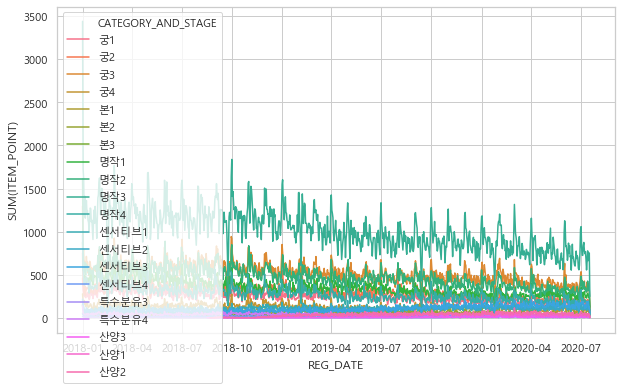

In [57]:
fig = plt.figure(figsize=(10,6))
sns.lineplot(x="REG_DATE", y="SUM(ITEM_POINT)",hue="CATEGORY_AND_STAGE",data=df); plt.show()

In [58]:
df2 = pd.pivot_table(df, values = 'SUM(ITEM_POINT)', index = 'REG_DATE', columns= 'CATEGORY_AND_STAGE')

In [59]:
import bokeh.plotting as bp
from bokeh.models.widgets import Panel, Tabs
from bokeh.io import output_file, show
from bokeh.plotting import figure

bp.output_notebook()

Loading BokehJS ...

In [60]:
p11 = figure(x_axis_type ='datetime', plot_width=800, plot_height=400)
p11.line(df2.index, df2['궁1'],       color ='green',  legend_label ='1단계-궁')
p11.line(df2.index, df2['명작1'],     color ='orange', legend_label ='1단계-명작')
p11.line(df2.index, df2['본1'],       color ='red',    legend_label ='1단계-본')
p11.line(df2.index, df2['산양1'],     color ='blue',   legend_label ='1단계-산양')
p11.line(df2.index, df2['센서티브1'], color ='purple', legend_label ='1단계-센서티브')
tab11 = Panel(child=p11, title="1단계")

p12 = figure(x_axis_type ='datetime', plot_width=800, plot_height=400)
p12.line(df2.index, df2['궁2'],       color ='green',  legend_label ='2단계-궁')
p12.line(df2.index, df2['명작2'],     color ='orange', legend_label ='2단계-명작')
p12.line(df2.index, df2['본2'],       color ='red',    legend_label ='2단계-본')
p12.line(df2.index, df2['산양2'],     color ='blue',   legend_label ='2단계-산양')
p12.line(df2.index, df2['센서티브2'], color ='purple', legend_label ='2단계-센서티브')
tab12 = Panel(child=p12, title="2단계")

p13 = figure(x_axis_type ='datetime', plot_width=800, plot_height=400)
p13.line(df2.index, df2['궁3'],       color ='green',  legend_label ='3단계-궁')
p13.line(df2.index, df2['명작3'],     color ='orange', legend_label ='3단계-명작')
p13.line(df2.index, df2['본3'],       color ='red',    legend_label ='3단계-본')
p13.line(df2.index, df2['산양3'],     color ='blue',   legend_label ='3단계-산양')
p13.line(df2.index, df2['센서티브3'], color ='purple', legend_label ='3단계-센서티브')
tab13 = Panel(child=p13, title="3단계")

p14 = figure(x_axis_type ='datetime', plot_width=800, plot_height=400)
p14.line(df2.index, df2['궁4'],       color ='green',  legend_label ='4단계-궁')
p14.line(df2.index, df2['명작4'],     color ='orange', legend_label ='4단계-명작')
p14.line(df2.index, df2['센서티브4'], color ='purple', legend_label ='4단계-센서티브')
tab14 = Panel(child=p14, title="4단계")

tabs1 = Tabs(tabs=[ tab11, tab12, tab13, tab14])

In [62]:
show(tabs1)